# Sampling

**Goal:** ...
  
This notebook is divided in two parts:
* **1. Bla**

In [1]:
%run ../setup_environment.ipy
%run ../Selene_Job.ipy

Setup environment... done!


<span style="color:green">✅ Working on **impact-annotator_env** conda environment.</span>

## Get the data

In [2]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact')

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [3]:
X, y = data.get_X_and_y('all', 'all')
Impact_Wrapper.print_info(X, y)

X: (194211, 45) | y: (194211,)


count_  freq_
False  187012  96.3%
True     7199   3.7%

## Set cross-validation strategies

We choose stratified folds (made by preserving the percentage of samples for each class) for both outer and nested cross-validation.

In [4]:
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

In [52]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

In [53]:
summary = Summary()

## Ridge Regression (L2 regularization)

In [54]:
metrics_list = []

In [55]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

for i, seed in enumerate([0, 1, 12, 1672, 456782]):
    print_md('**sampling {}** (seed = {})'.format(i, seed))
    
    model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=seed),
                          StandardScaler(),
                          LogisticRegressionCV(cv=nested_cv_strategy, scoring='roc_auc', random_state=42))
    
    metrics_list.append(Metrics(model, X, y, cv_strategy, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall']))
    # metrics_list[-1].print_mean()

**sampling 0** (seed = 0)

Run model... done! (8.56s)


**sampling 1** (seed = 1)

Run model... done! (7.07s)


**sampling 2** (seed = 12)

Run model... done! (7.09s)


**sampling 3** (seed = 1672)

Run model... done! (7.14s)


**sampling 4** (seed = 456782)

Run model... done! (7.17s)


**sampling 0**

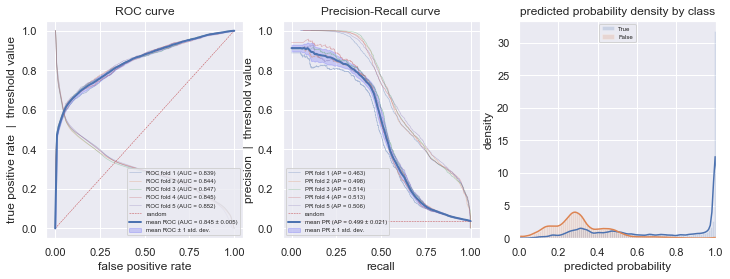

**sampling 1**

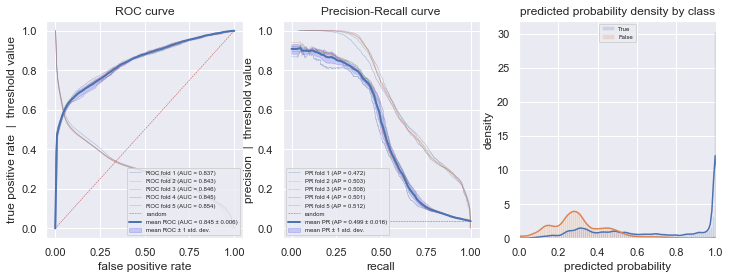

**sampling 2**

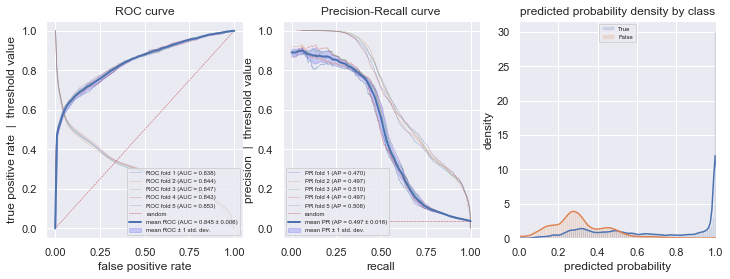

**sampling 3**

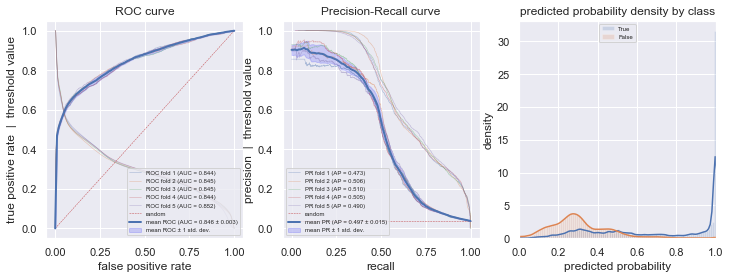

**sampling 4**

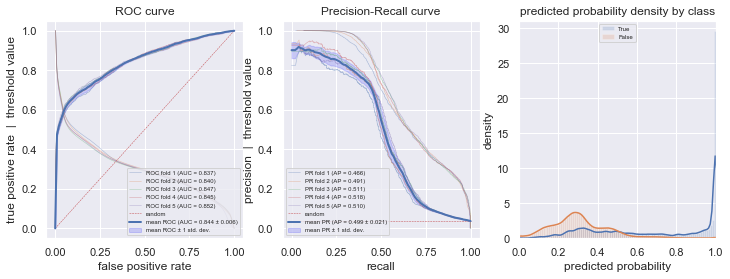

In [9]:
for i, metrics in enumerate(metrics_list):
    print_md('**sampling {}**'.format(i))
    metrics.plot_threshold_decision_curves(figsize=(12, 4))
    plt.show()

**sampling 0**

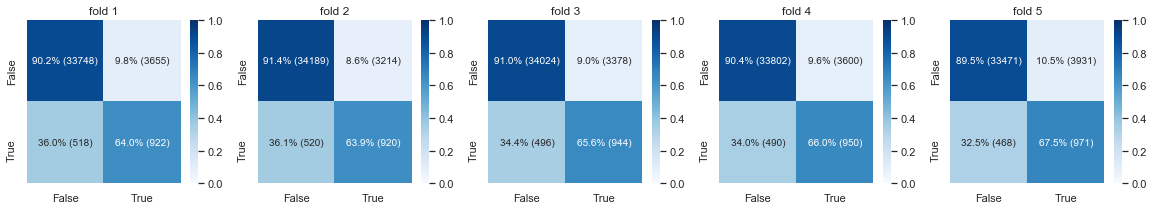

**sampling 1**

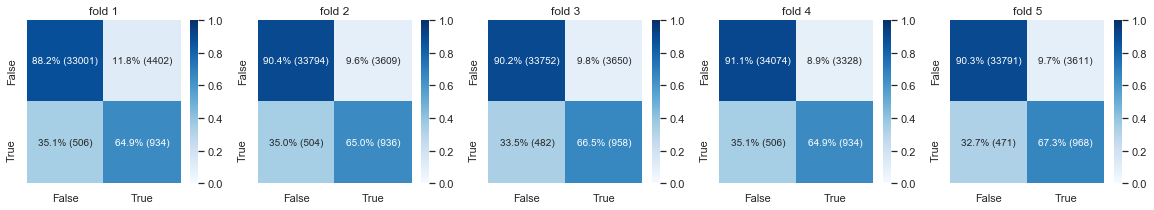

**sampling 2**

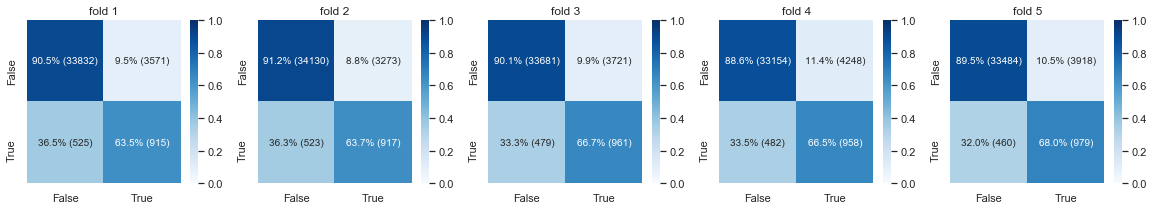

**sampling 3**

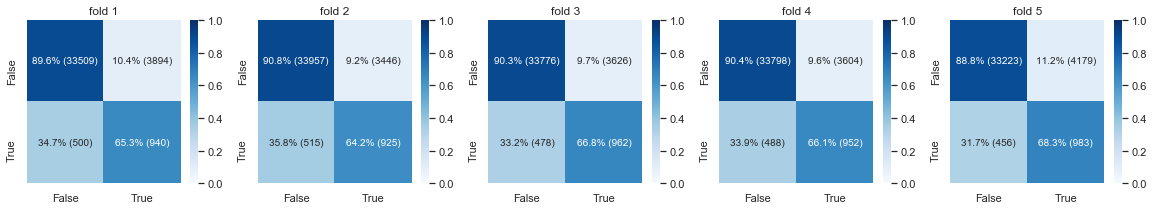

**sampling 4**

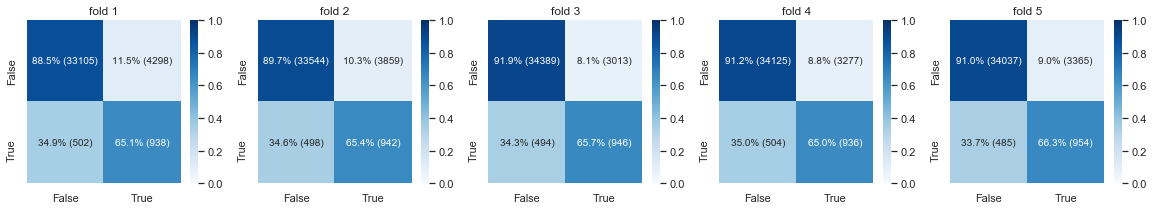

In [10]:
for i, metrics in enumerate(metrics_list):
    print_md('**sampling {}**'.format(i))
    metrics.plot_confusion_matrix()
    plt.show()

In [56]:
for i, color in enumerate(['firebrick', 'crimson', 'tomato', 'coral', 'lightcoral']):
    summary.add(metrics_list[i], 'RidgeRegression_sampling_{}'.format(i), color)

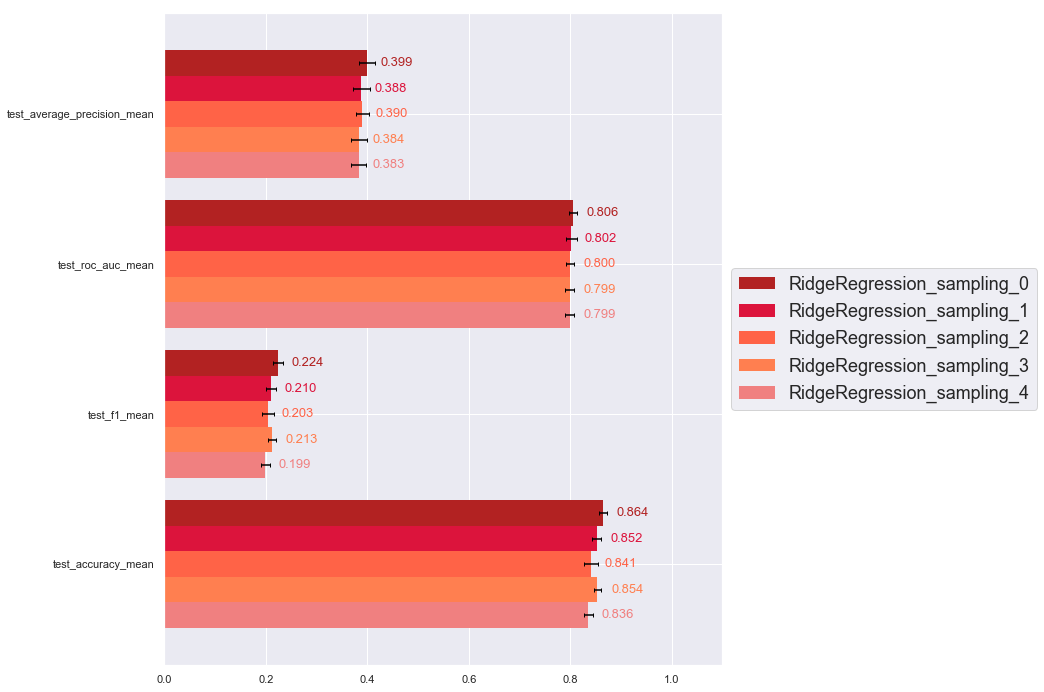

In [57]:
summary.display()
summary.plot()

## Random Forest

In [93]:
job_list = []
for i in range(5):
    job_list.append(Selene_Job('RandomForest_sampling_{}'.format(i), 'guilminp', '/home/guilminp/impact-annotator', '../ssh_remote_jobs'))

➞ mkdir on local computer ../ssh_remote_jobs/job_RandomForest_sampling_0


<span style="color:green">Job < RandomForest_sampling_0 >: </span>✅ created

➞ mkdir on local computer ../ssh_remote_jobs/job_RandomForest_sampling_1


<span style="color:green">Job < RandomForest_sampling_1 >: </span>✅ created

➞ mkdir on local computer ../ssh_remote_jobs/job_RandomForest_sampling_2


<span style="color:green">Job < RandomForest_sampling_2 >: </span>✅ created

➞ mkdir on local computer ../ssh_remote_jobs/job_RandomForest_sampling_3


<span style="color:green">Job < RandomForest_sampling_3 >: </span>✅ created

➞ mkdir on local computer ../ssh_remote_jobs/job_RandomForest_sampling_4


<span style="color:green">Job < RandomForest_sampling_4 >: </span>✅ created

In [13]:
job_list = []
for i in range(5):
    job_list.append(Selene_Job('RandomForest_sampling_{}'.format(i), 'guilminp', '/home/guilminp/impact-annotator', '../ssh_remote_jobs', load_from_id=True))

<span style="color:green">Job < RandomForest_sampling_0 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_sampling_1 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_sampling_2 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_sampling_3 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_sampling_4 >: </span>✅ job found and reloaded

In [96]:
for job in job_list:
    job.load_data(X, y)

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_sampling_0


<span style="color:green">Job < RandomForest_sampling_0 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_sampling_1


<span style="color:green">Job < RandomForest_sampling_1 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_sampling_2


<span style="color:green">Job < RandomForest_sampling_2 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_sampling_3


<span style="color:green">Job < RandomForest_sampling_3 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_sampling_4


<span style="color:green">Job < RandomForest_sampling_4 >: </span>✅ data loaded

:warning: CELL RAN USING [0, 1, 12, 1672, 456782] FOR [0, 1, 2, 3, 4]

In [31]:
%%writefile {job_list[4].script_path}

# load the ml_tools functions
%run ../../metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

# setup cross-validation and import modules
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

# setup imblearn
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

# choose a model and run it
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters_grid = [
    {'randomforestclassifier__n_estimators': [100, 500, 1000, 1500], 'randomforestclassifier__criterion': ['gini', 'entropy'], 'randomforestclassifier__max_depth': [5, 10, 20, 30, 40]}
]

pipe = make_pipeline(RandomUnderSampler(ratio='majority', random_state=456782),
                     RandomForestClassifier(random_state=42))

model = GridSearchCV(pipe, parameters_grid, cv=nested_cv_strategy, scoring='roc_auc', refit=True, return_train_score=True)
metrics = Metrics(model, X, y, cv_strategy, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall'])

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Overwriting ../ssh_remote_jobs/job_RandomForest_sampling_4/script.ipy


In [32]:
for job in job_list:
    job.run(n_jobs=10, short_job=True, memory=16)

➞ scp ../ssh_remote_jobs/job_RandomForest_sampling_0 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1531    39.8KB/s   00:00    
metrics.pkl                                   100% 6535KB  15.4MB/s   00:00    
script.ipy                                    100% 1265    43.2KB/s   00:00    
X.pkl                                         100%   43MB  14.3MB/s   00:03    
y.pkl                                         100%  190KB   3.1MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_0
Job <28835655> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_sampling_0 -We 59 -n 10 -R "span[ptile=5,mem=16]" "ipython script.ipy"

<span style="color:green">Job < RandomForest_sampling_0 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_sampling_1 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1531    71.9KB/s   00:00    
metrics.pkl                                   100% 6546KB  13.0MB/s   00:00    
script.ipy                                    100% 1265    41.8KB/s   00:00    
X.pkl                                         100%   43MB  14.3MB/s   00:03    
y.pkl                                         100%  190KB   2.6MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_1
Job <28835656> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_sampling_1 -We 59 -n 10 -R "span[ptile=5,mem=16]" "ipython script.ipy"

<span style="color:green">Job < RandomForest_sampling_1 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_sampling_2 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1531    54.5KB/s   00:00    
metrics.pkl                                   100% 6527KB  11.3MB/s   00:00    
script.ipy                                    100% 1266    26.3KB/s   00:00    
X.pkl                                         100%   43MB  10.7MB/s   00:04    
y.pkl                                         100%  190KB   2.1MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_2
Job <28835657> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_sampling_2 -We 59 -n 10 -R "span[ptile=5,mem=16]" "ipython script.ipy"

<span style="color:green">Job < RandomForest_sampling_2 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_sampling_3 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1531    67.4KB/s   00:00    
metrics.pkl                                   100% 6503KB  11.5MB/s   00:00    
script.ipy                                    100% 1268    15.9KB/s   00:00    
X.pkl                                         100%   43MB  10.7MB/s   00:04    
y.pkl                                         100%  190KB 206.2KB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_3
Job <28835658> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_sampling_3 -We 59 -n 10 -R "span[ptile=5,mem=16]" "ipython script.ipy"

<span style="color:green">Job < RandomForest_sampling_3 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_sampling_4 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1531   108.6KB/s   00:00    
metrics.pkl                                   100% 6517KB  14.4MB/s   00:00    
script.ipy                                    100% 1270    12.5KB/s   00:00    
X.pkl                                         100%   43MB  14.3MB/s   00:03    
y.pkl                                         100%  190KB   2.6MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_4
Job <28835659> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_sampling_4 -We 59 -n 10 -R "span[ptile=5,mem=16]" "ipython script.ipy"

<span style="color:green">Job < RandomForest_sampling_4 >: </span>✅ submitted<br>

In [47]:
for job in job_list:
    job.get_results()

<span style="color:green">Job < RandomForest_sampling_0 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_0 to ../ssh_remote_jobs/job_RandomForest_sampling_0
metrics.pkl                                   100% 6466KB   2.5MB/s   00:02    
job_output.txt                                100% 1535   284.9KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.896 ± 0.002
▴ Mean f1               : 0.344 ± 0.010
▴ Mean roc_auc          : 0.893 ± 0.005
▴ Mean average_precision: 0.583 ± 0.013


<span style="color:green">Job < RandomForest_sampling_1 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_1 to ../ssh_remote_jobs/job_RandomForest_sampling_1
metrics.pkl                                   100% 6482KB   3.2MB/s   00:02    
job_output.txt                                100% 1535   287.4KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.904 ± 0.003
▴ Mean f1               : 0.359 ± 0.009
▴ Mean roc_auc          : 0.894 ± 0.006
▴ Mean average_precision: 0.589 ± 0.017


<span style="color:green">Job < RandomForest_sampling_2 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_2 to ../ssh_remote_jobs/job_RandomForest_sampling_2
metrics.pkl                                   100% 6463KB   4.7MB/s   00:01    
job_output.txt                                100% 1535    58.5KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.896 ± 0.003
▴ Mean f1               : 0.342 ± 0.009
▴ Mean roc_auc          : 0.893 ± 0.005
▴ Mean average_precision: 0.587 ± 0.016


<span style="color:green">Job < RandomForest_sampling_3 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_3 to ../ssh_remote_jobs/job_RandomForest_sampling_3
metrics.pkl                                   100% 6457KB   3.9MB/s   00:01    
job_output.txt                                100% 1535    26.5KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.894 ± 0.002
▴ Mean f1               : 0.340 ± 0.004
▴ Mean roc_auc          : 0.893 ± 0.006
▴ Mean average_precision: 0.584 ± 0.015


<span style="color:green">Job < RandomForest_sampling_4 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_4 to ../ssh_remote_jobs/job_RandomForest_sampling_4
metrics.pkl                                   100% 6459KB   3.9MB/s   00:01    
job_output.txt                                100% 1535   107.1KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.900 ± 0.002
▴ Mean f1               : 0.351 ± 0.007
▴ Mean roc_auc          : 0.893 ± 0.006
▴ Mean average_precision: 0.582 ± 0.014


**sampling 4**

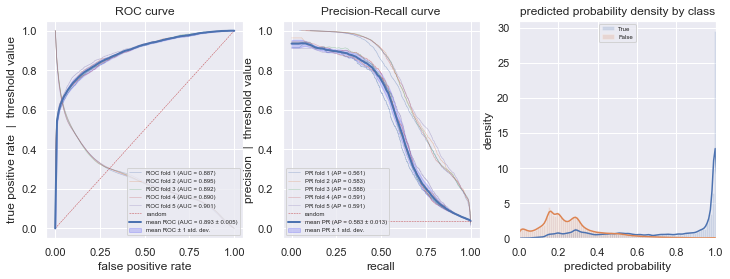

**sampling 4**

**sampling 4**

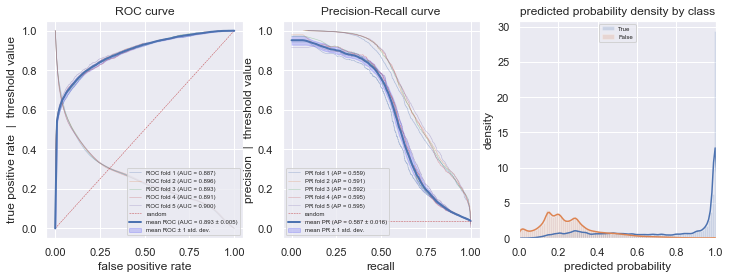

**sampling 4**

**sampling 4**

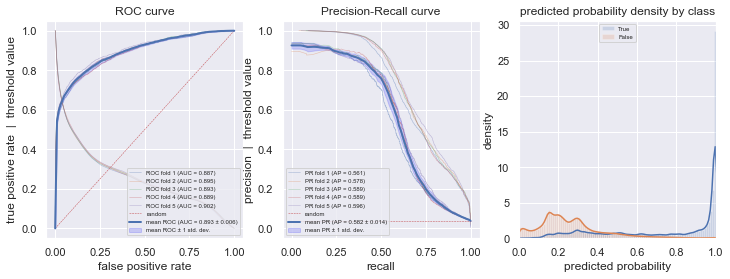

In [48]:
for job in job_list:
    if hasattr(job, 'metrics'):
        print_md('**sampling {}**'.format(i))
        job.metrics.plot_threshold_decision_curves(figsize=(12, 4))
        plt.show()

**sampling 4**

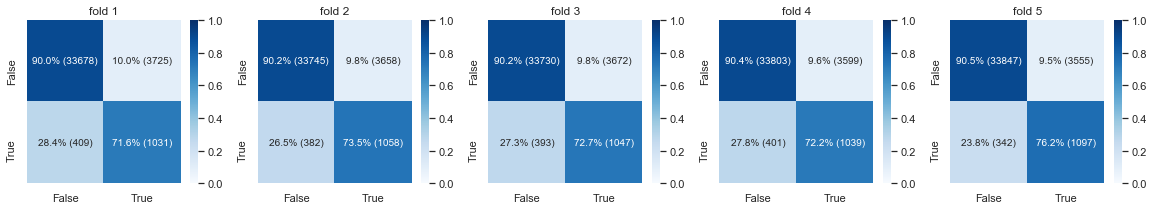

**sampling 4**

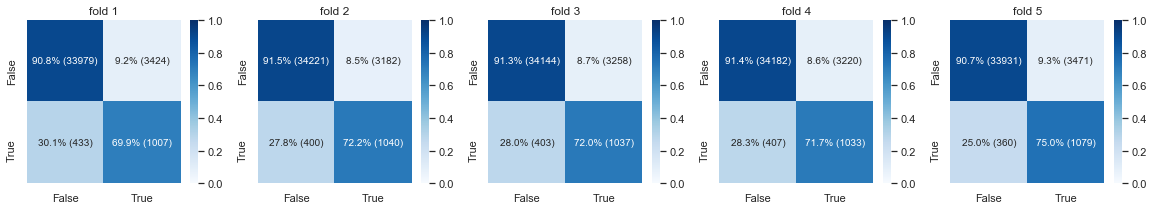

**sampling 4**

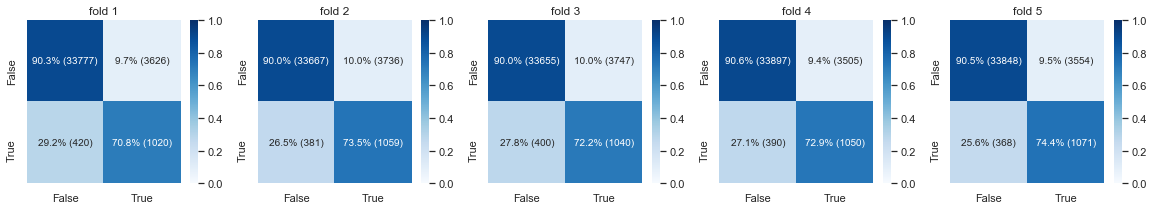

**sampling 4**

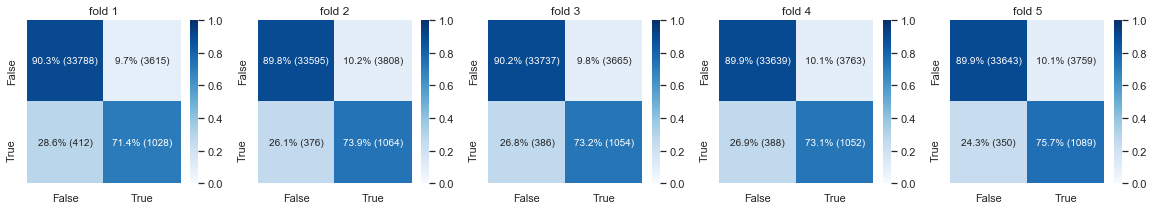

**sampling 4**

In [49]:
for job in job_list:
    if hasattr(job, 'metrics'):
        print_md('**sampling {}**'.format(i))
        job.metrics.plot_confusion_matrix()
        plt.show()

**sampling 4**

3 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → randomforestclassifier__criterion   : ['entropy' 'gini']
  → randomforestclassifier__max_depth   : [5 10 20 30 40]
  → randomforestclassifier__n_estimators: [100 500 1000 1500]
Best hyperparameters for each fold:
fold 0: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 1: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 2: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 3: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 4: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifie

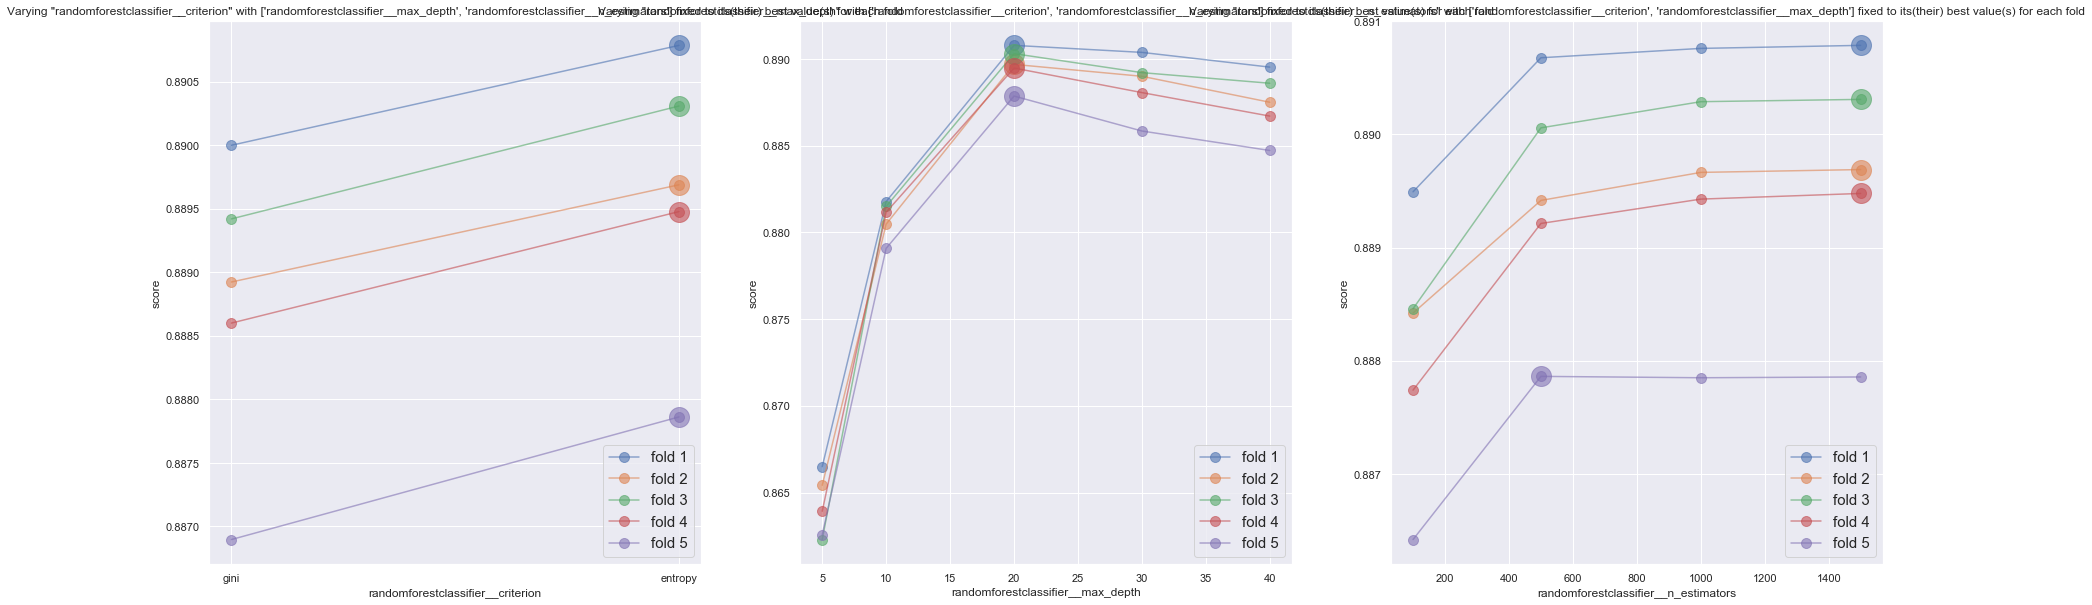

**sampling 4**

3 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → randomforestclassifier__criterion   : ['entropy' 'gini']
  → randomforestclassifier__max_depth   : [5 10 20 30 40]
  → randomforestclassifier__n_estimators: [100 500 1000 1500]
Best hyperparameters for each fold:
fold 0: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 1: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 2: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 3: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 4: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifie

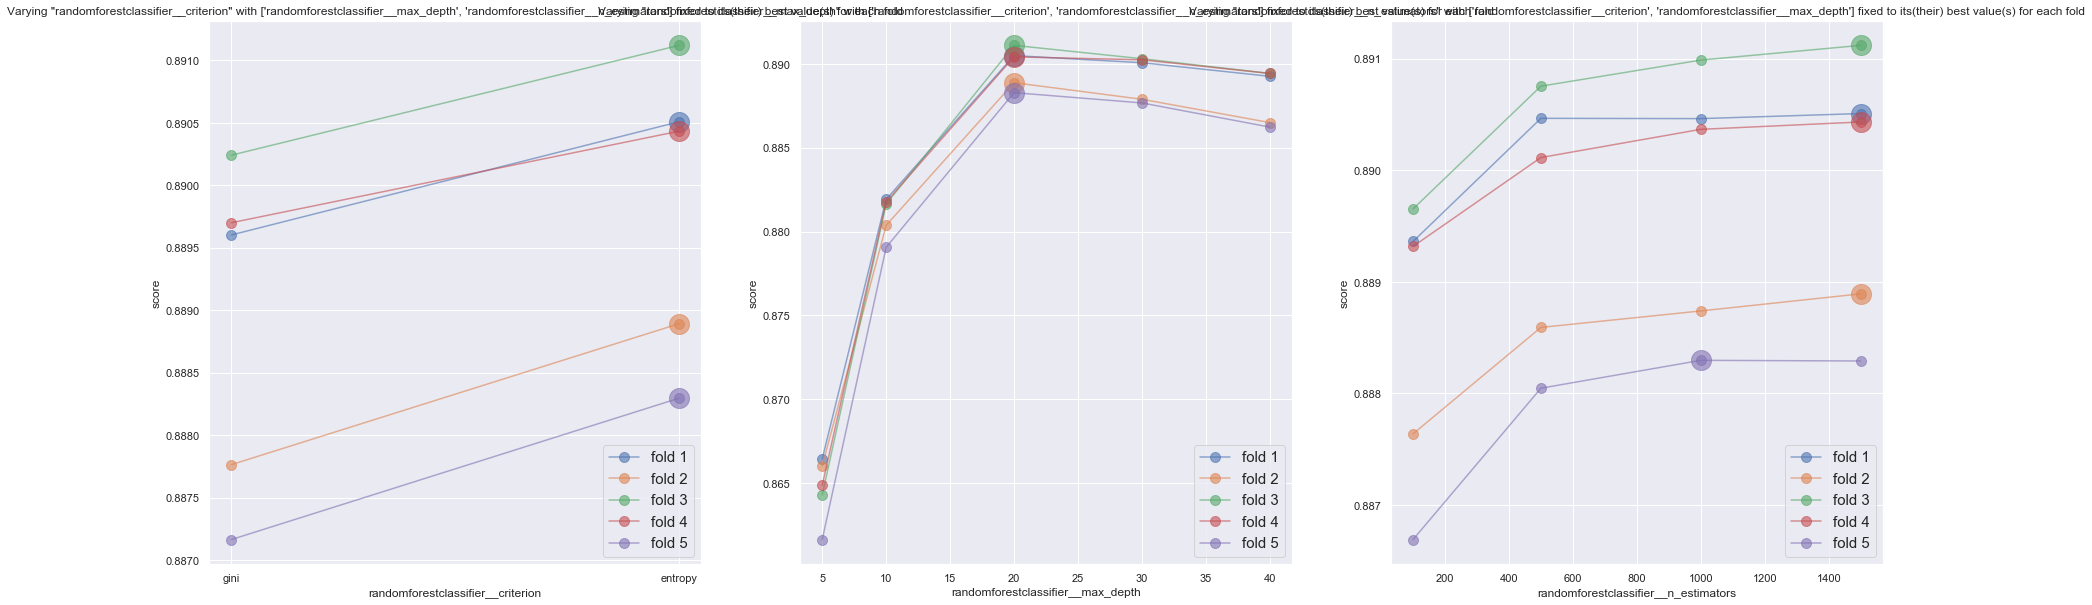

**sampling 4**

3 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → randomforestclassifier__criterion   : ['entropy' 'gini']
  → randomforestclassifier__max_depth   : [5 10 20 30 40]
  → randomforestclassifier__n_estimators: [100 500 1000 1500]
Best hyperparameters for each fold:
fold 0: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1000}
fold 1: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1000}
fold 2: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 3: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 4: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifie

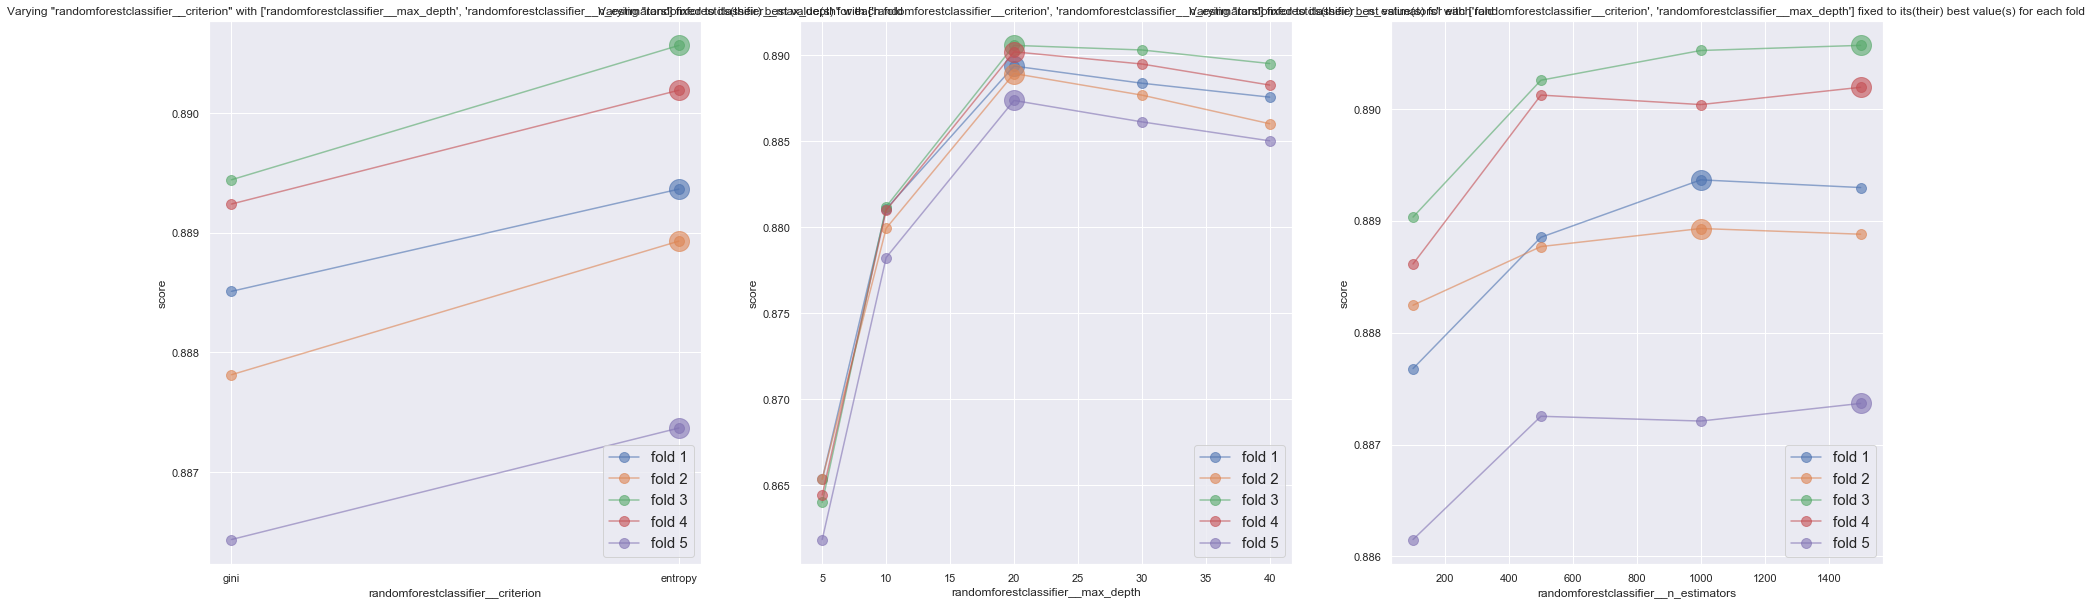

**sampling 4**

3 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → randomforestclassifier__criterion   : ['entropy' 'gini']
  → randomforestclassifier__max_depth   : [5 10 20 30 40]
  → randomforestclassifier__n_estimators: [100 500 1000 1500]
Best hyperparameters for each fold:
fold 0: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1000}
fold 1: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1000}
fold 2: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 3: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 4: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifie

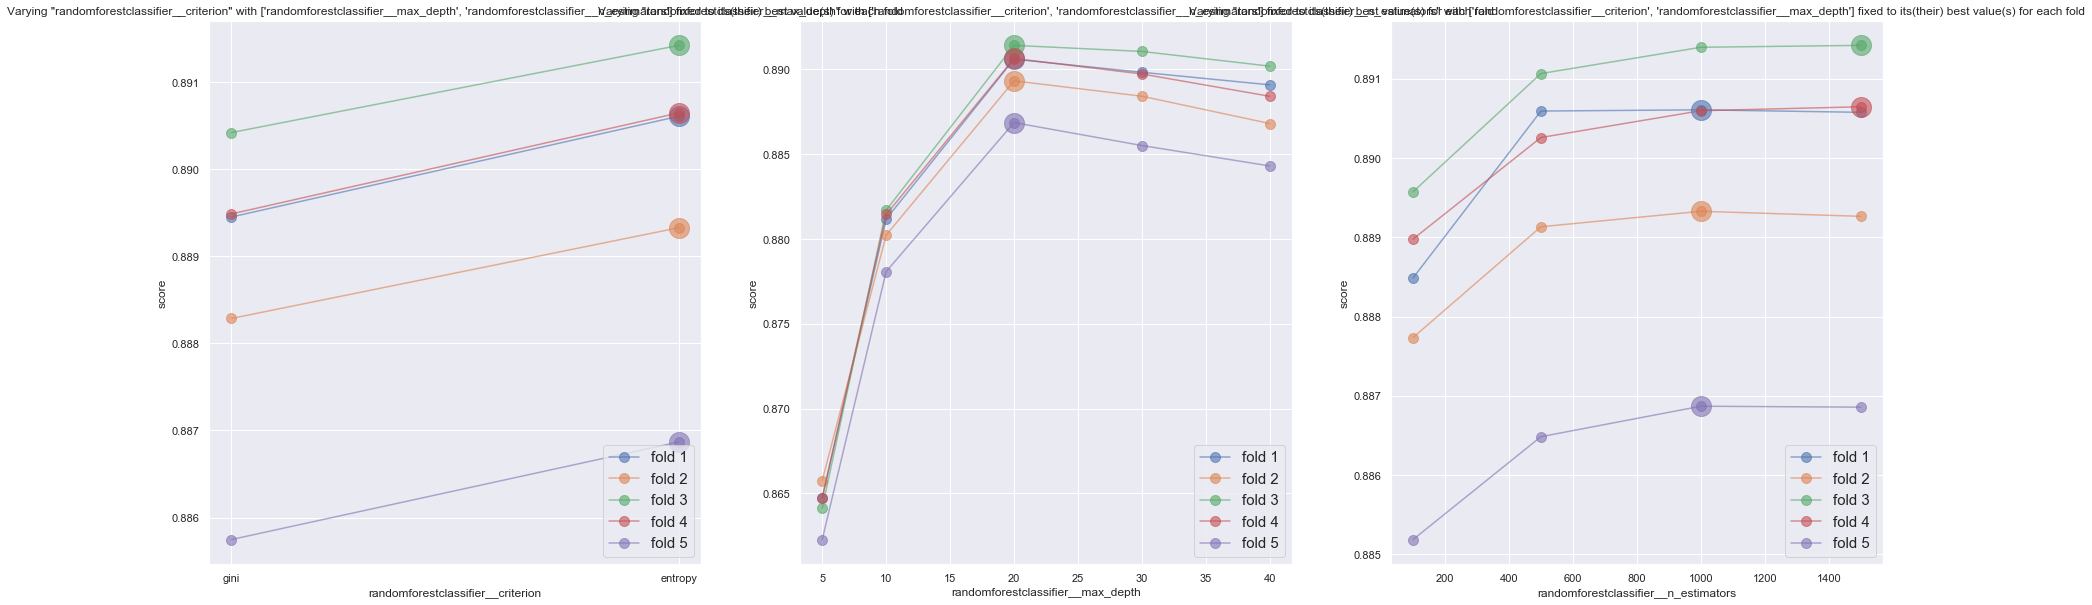

**sampling 4**

3 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → randomforestclassifier__criterion   : ['entropy' 'gini']
  → randomforestclassifier__max_depth   : [5 10 20 30 40]
  → randomforestclassifier__n_estimators: [100 500 1000 1500]
Best hyperparameters for each fold:
fold 0: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 1: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 2: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 3: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1000}
fold 4: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifie

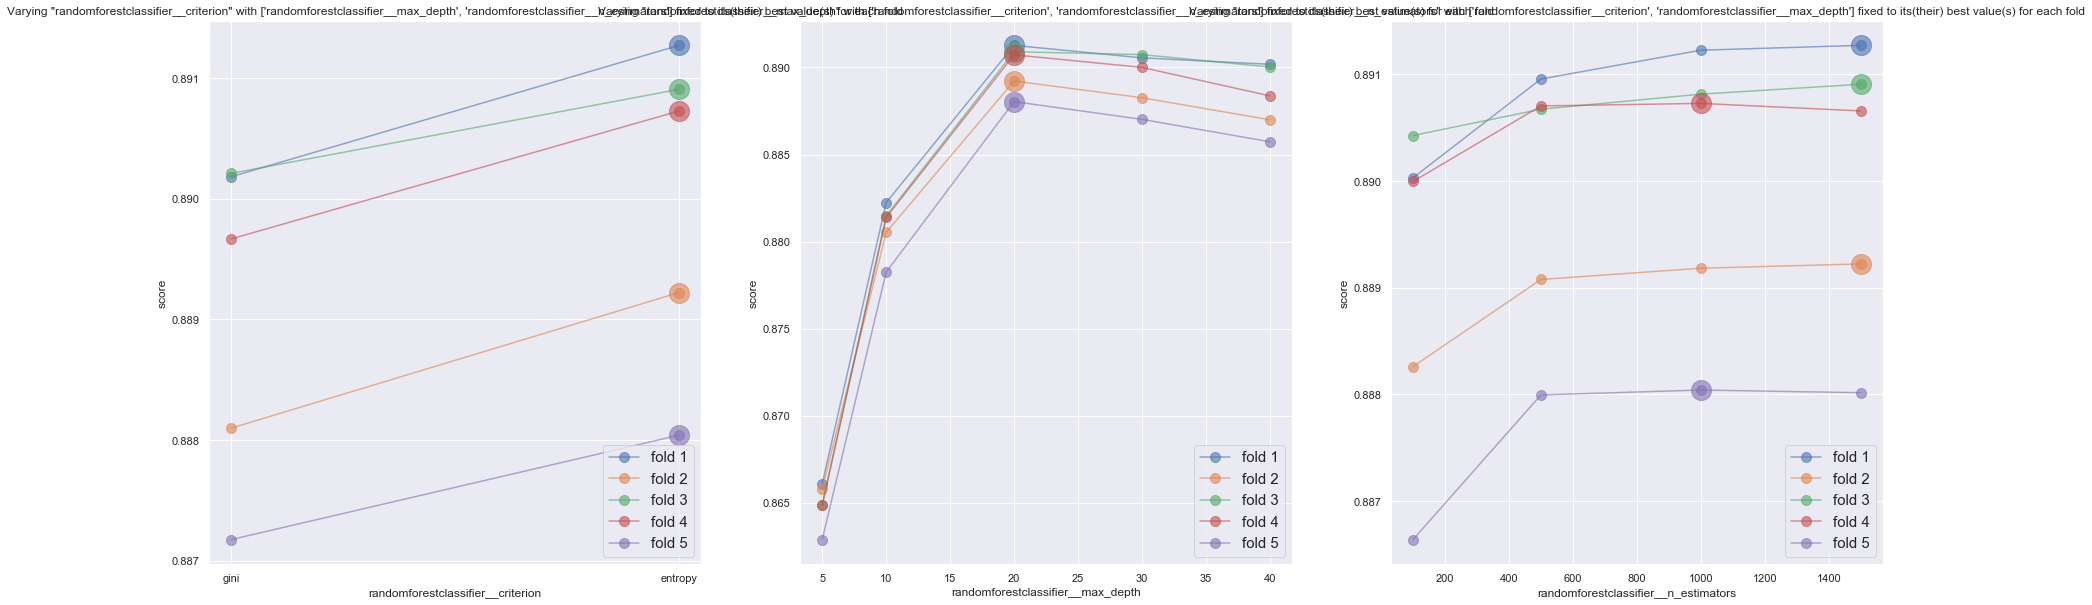

In [50]:
for job in job_list:
    if hasattr(job, 'metrics'):
        print_md('**sampling {}**'.format(i))
        job.metrics.plot_grid_search_results(plot_error_bar=False)
        plt.show()

**sampling 0**  (seed = 0)

Fit model... done! (85.53s)


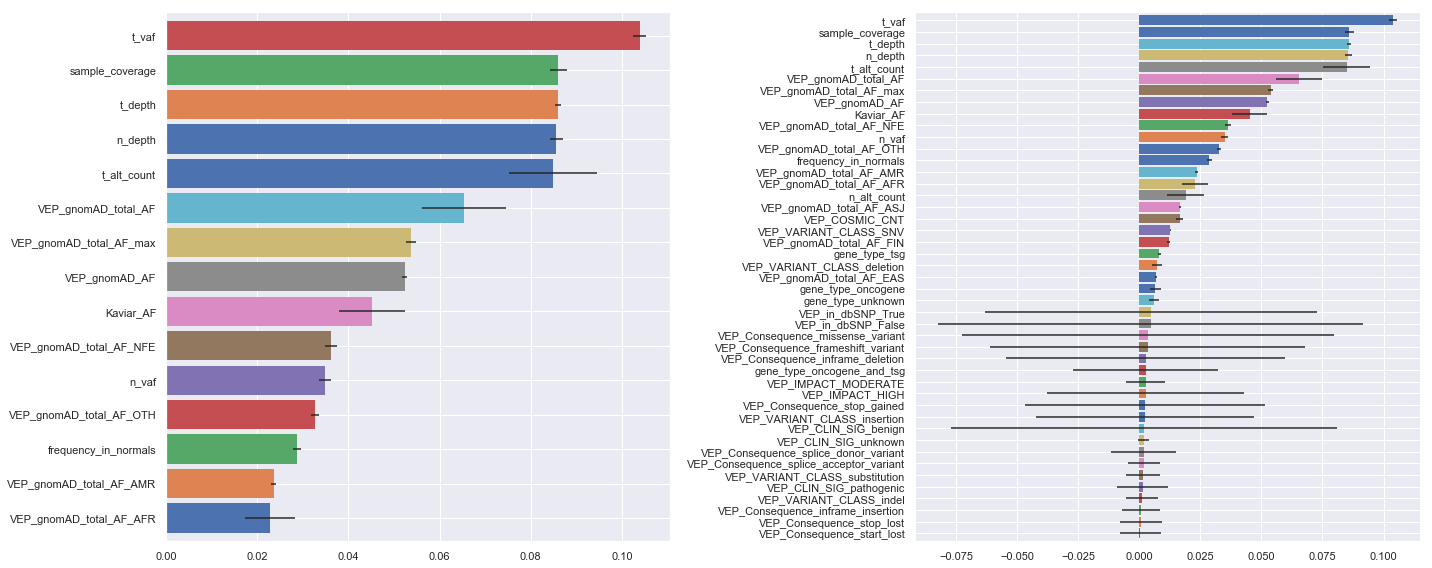

**sampling 1**  (seed = 1)

Fit model... done! (91.48s)


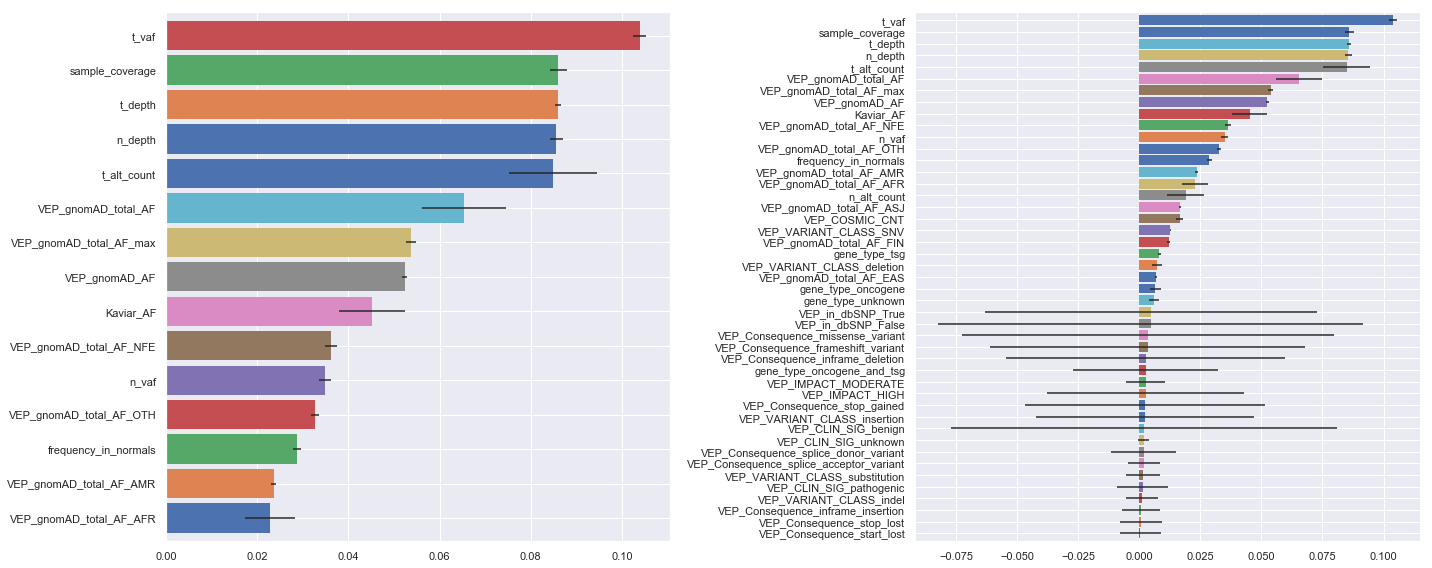

**sampling 2**  (seed = 12)

Fit model... done! (97.20s)


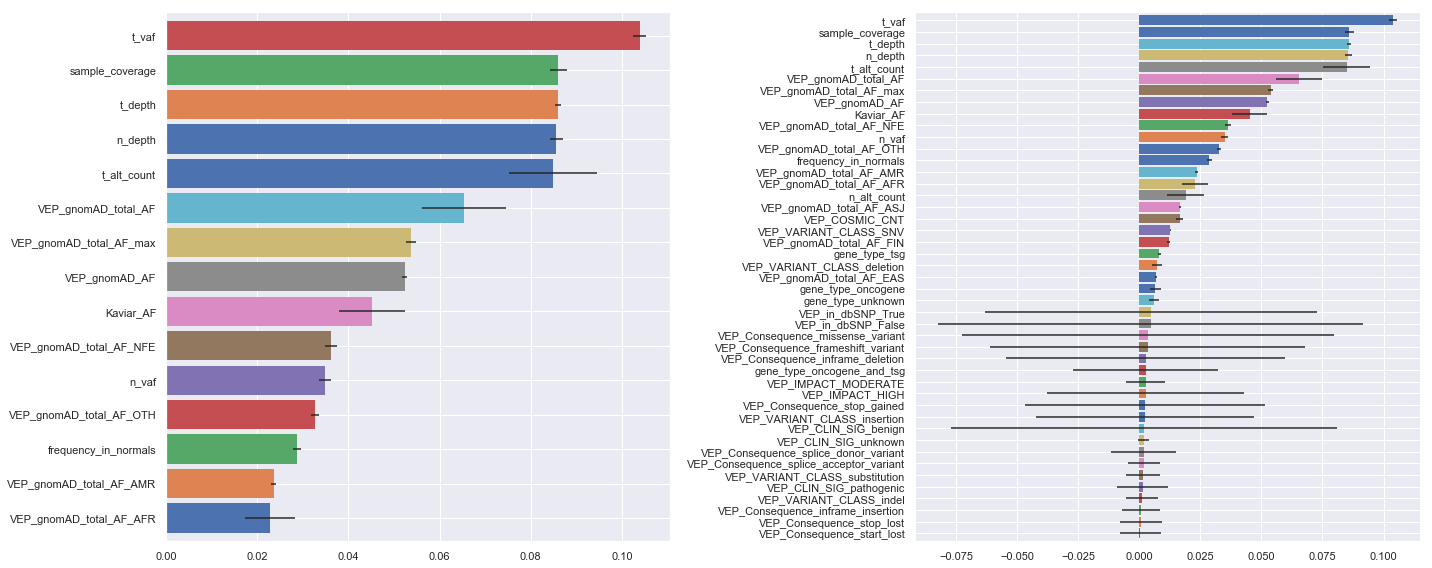

**sampling 3**  (seed = 1672)

Fit model... done! (86.17s)


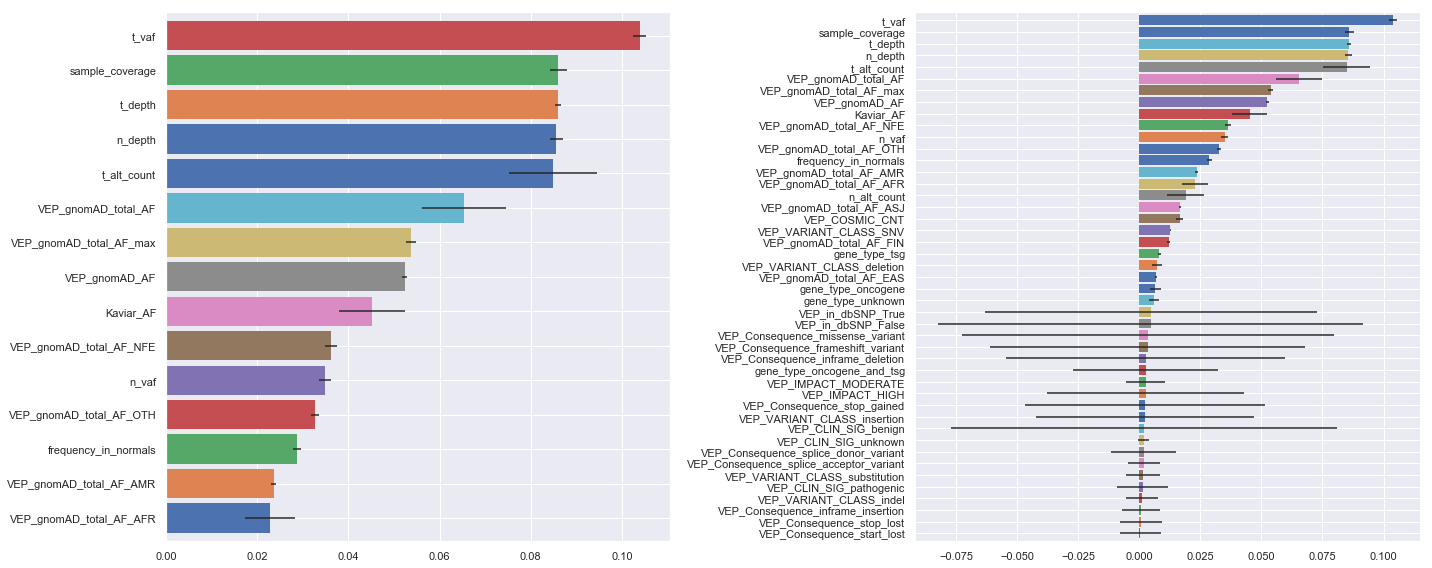

**sampling 4**  (seed = 456782)

Fit model... done! (87.10s)


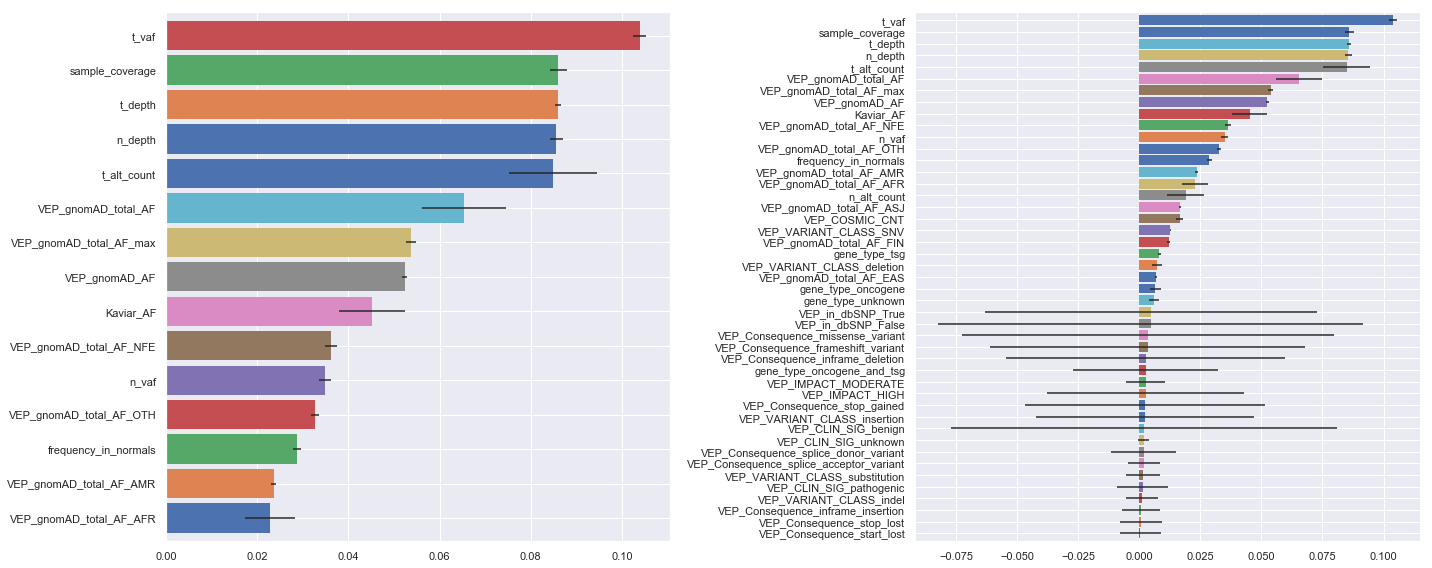

In [46]:
from sklearn.ensemble import RandomForestClassifier

model_bestRF = RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=30, criterion='entropy', n_jobs=5)

for i, seed in enumerate([0, 1, 12, 1672, 456782]):
    print_md('**sampling {}**  (seed = {})'.format(i, seed))
    
    model_bestRF = make_pipeline(RandomUnderSampler(ratio='majority', random_state=seed),
                                 RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=30, criterion='entropy', n_jobs=5))
    
    metrics = Metrics(model_bestRF, X, y, cv_strategy, n_jobs=5, run_model=False)
    metrics.model = metrics.model.steps[1][1]
    metrics.plot_features_importance(random_forest=True)
    plt.show()

In [58]:
for i, color in enumerate(['navy', 'indigo', 'purple', 'darkviolet', 'orchid']):
    summary.add(job_list[i].metrics, 'RandomForest_sampling_{}'.format(i), color)

## Summary

In [61]:
summary = Summary()
summary.load('sampling_summary.pkl')
#summary.save('sampling_summary.pkl')

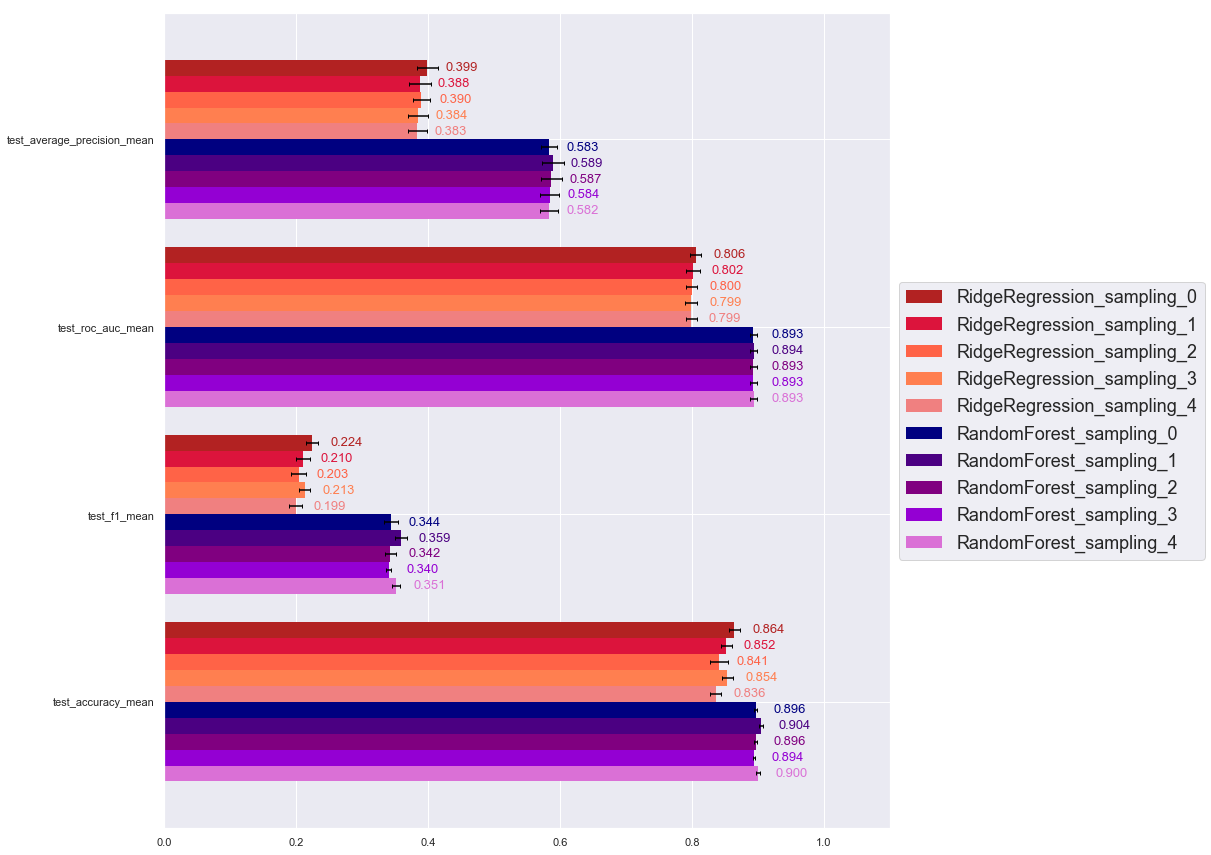

In [62]:
summary.display()
summary.plot(figsize=(13, 15))

# Unified IMPACT

In [91]:
summary = Summary()

## Get the data

In [67]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact')

In [68]:
def get_random_sample(x, max_number=3):
    if x.shape[0] > max_number:
        return x.sample(max_number, random_state=42).tolist()
    else:
        return x.tolist()

aggregation = {
    'mut_key': 'count',
    'sample_mut_key': [lambda x: x.tolist(),
                       get_random_sample]
}

dd = data.impact.groupby('mut_key').aggregate(aggregation)
dd.head(10)

mut_key  \
                                   count   
mut_key                                    
10_104263912_G_A                       1   
10_104263932_GCGCCCCCGGCCCCACC_-       2   
10_104263935_C_-                       1   
10_104263935_C_T                       1   
10_104263941_G_A                       3   
10_104263952_C_-                       1   
10_104263959_C_T                       1   
10_104263973_-_C                      12   
10_104263974_C_-                       3   
10_104263979_C_A                       1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                    sample_mut_key  \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                          <lambda>   
mut_key                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
10_104263912_G_A                                                                                                                                                                                                                                                                                                                                                                                                                              [P-0004423-T01-IM5_10_104263912_G_A]   
10_104263932_GCGCCCCCGGCCCCACC_-                                                                                                                                                                                                                                                                                                                                          [P-0001027-T01-IM3_10_104263932_GCGCCCCCGGCCCCACC_-, P-0015687-T01-IM6_10_104263932_GCGCCCCCGGCCCCACC_-]   
10_104263935_C_-                                                                                                                                                                                                                                                                                                                                                                                                                              [P-0015938-T01-IM6_10_104263935_C_-]   
10_104263935_C_T                                                                                                                                                                                                                                                                                                                                                                                                                              [P-0012445-T01-IM5_10_104263935_C_T]   
10_104263941_G_A                                                                                                                                                          

In [69]:
selected_sample_mut_key = [x for sublist in dd.sample_mut_key.get_random_sample for x in sublist]

print(data.impact.shape)
data.impact = data.impact[data.impact.sample_mut_key.isin(selected_sample_mut_key)].copy()
print(data.impact.shape)

(194211, 63)
(160752, 63)


In [70]:
features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [71]:
X, y = data.get_X_and_y('all', 'all')
Impact_Wrapper.print_info(X, y)

X: (160752, 45) | y: (160752,)


count_  freq_
False  155564  96.8%
True     5188   3.2%

## Ridge Regression (L2 regularization)

In [72]:
metrics_list = []

In [73]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

for i, seed in enumerate([0, 1, 12, 1672, 456782]):
    print_md('**sampling {}** (seed = {})'.format(i, seed))
    
    model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=seed),
                          StandardScaler(),
                          LogisticRegressionCV(cv=nested_cv_strategy, scoring='roc_auc', random_state=42))
    
    metrics_list.append(Metrics(model, X, y, cv_strategy, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall']))
    # metrics_list[-1].print_mean()

**sampling 0** (seed = 0)

Run model... done! (7.37s)


**sampling 1** (seed = 1)

Run model... done! (6.91s)


**sampling 2** (seed = 12)

Run model... done! (6.83s)


**sampling 3** (seed = 1672)

Run model... done! (6.72s)


**sampling 4** (seed = 456782)

Run model... done! (6.92s)


**sampling 0**

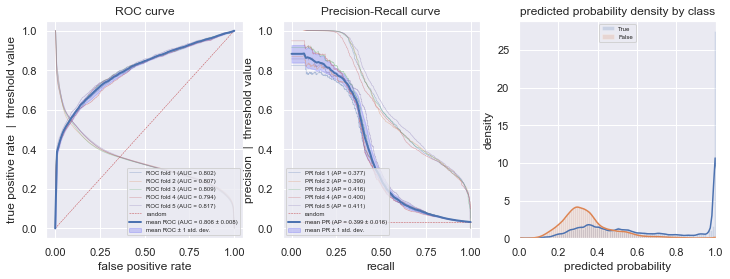

**sampling 1**

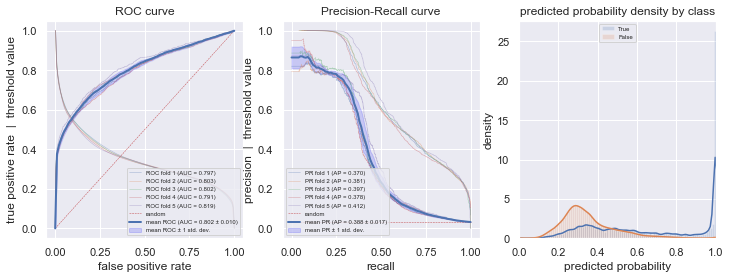

**sampling 2**

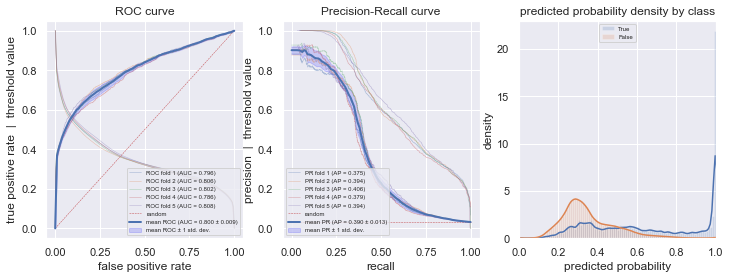

**sampling 3**

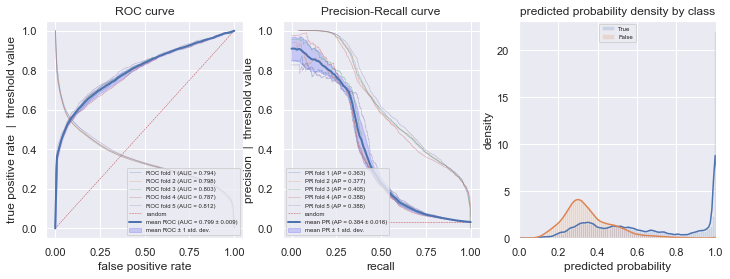

**sampling 4**

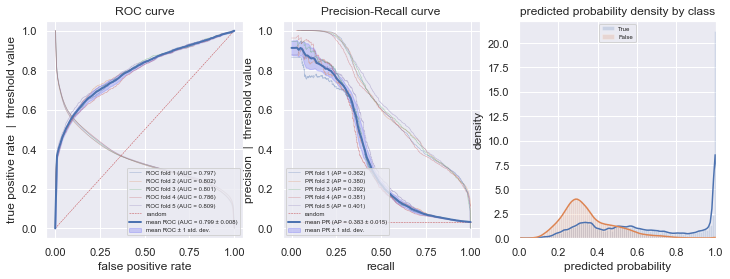

In [74]:
for i, metrics in enumerate(metrics_list):
    print_md('**sampling {}**'.format(i))
    metrics.plot_threshold_decision_curves(figsize=(12, 4))
    plt.show()

**sampling 0**

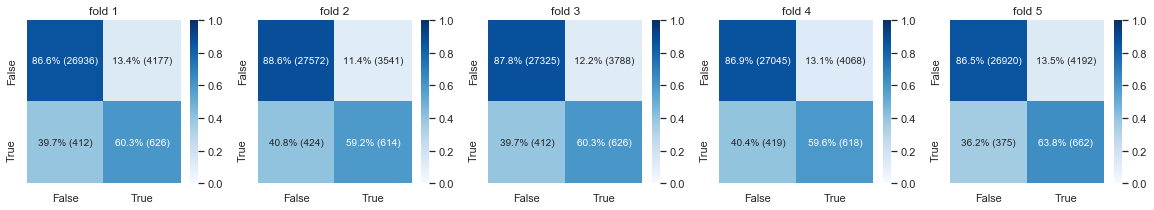

**sampling 1**

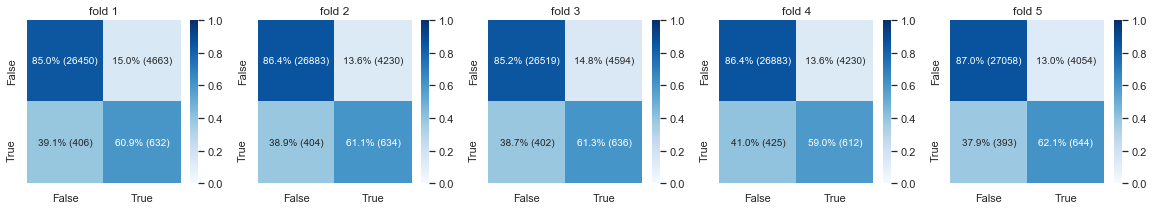

**sampling 2**

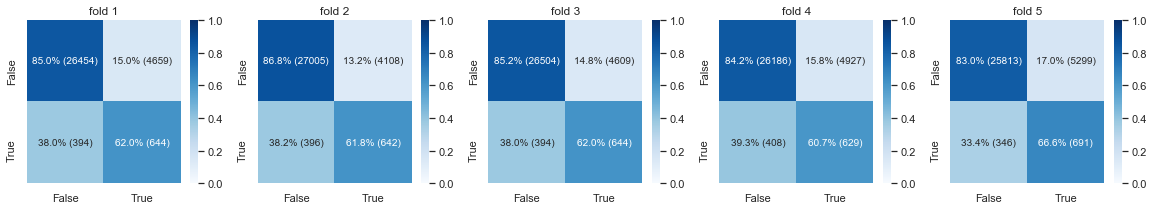

**sampling 3**

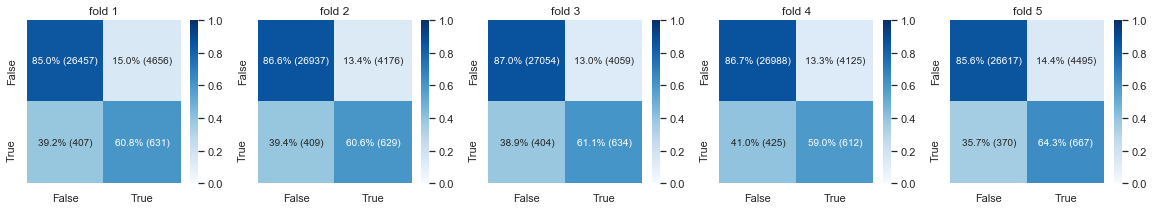

**sampling 4**

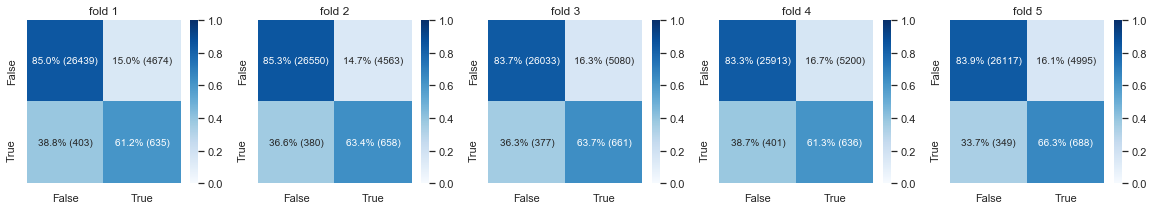

In [75]:
for i, metrics in enumerate(metrics_list):
    print_md('**sampling {}**'.format(i))
    metrics.plot_confusion_matrix()
    plt.show()

In [92]:
for i, color in enumerate(['firebrick', 'crimson', 'tomato', 'coral', 'lightcoral']):
    summary.add(metrics_list[i], 'RidgeRegression_unified_sampling_{}'.format(i), color)

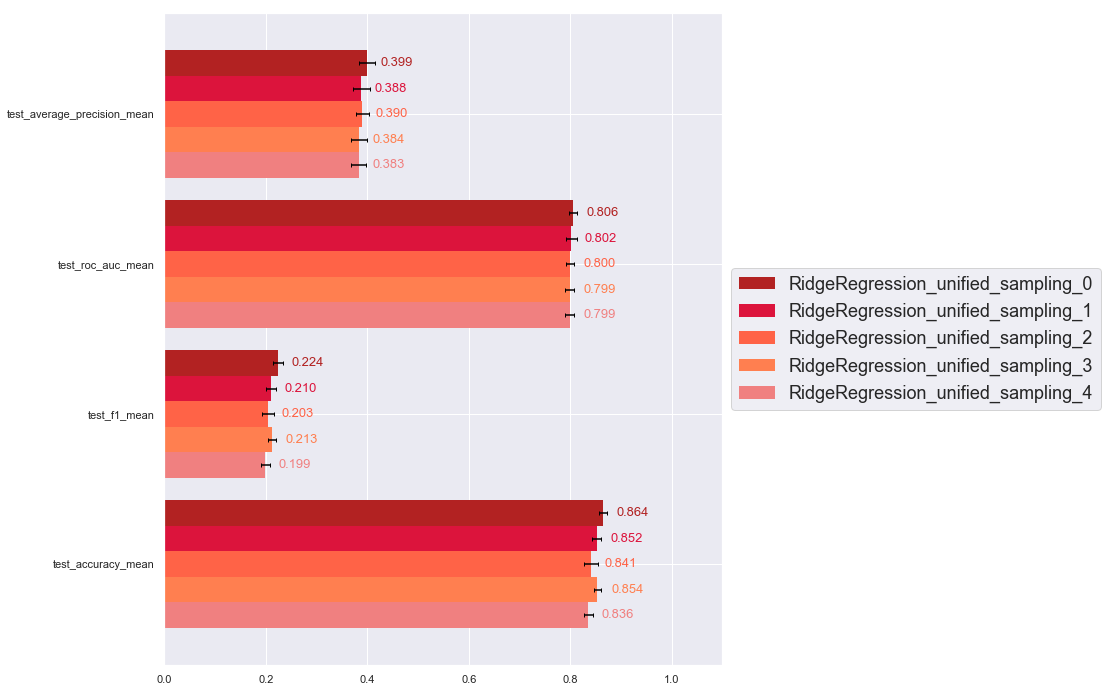

In [94]:
summary.display()
summary.plot()

## Random Forest

In [63]:
job_list = []
for i in range(5):
    job_list.append(Selene_Job('RandomForest_unified_sampling_{}'.format(i), 'guilminp', '/home/guilminp/impact-annotator', '../ssh_remote_jobs'))

➞ mkdir on local computer ../ssh_remote_jobs/job_RandomForest_unified_sampling_0


<span style="color:green">Job < RandomForest_unified_sampling_0 >: </span>✅ created

<span style="color:red">Job < RandomForest_unified_sampling_1 >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

<span style="color:red">Job < RandomForest_unified_sampling_2 >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

<span style="color:red">Job < RandomForest_unified_sampling_3 >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

➞ mkdir on local computer ../ssh_remote_jobs/job_RandomForest_unified_sampling_4


<span style="color:green">Job < RandomForest_unified_sampling_4 >: </span>✅ created

In [95]:
job_list = []
for i in range(5):
    job_list.append(Selene_Job('RandomForest_unified_sampling_{}'.format(i), 'guilminp', '/home/guilminp/impact-annotator', '../ssh_remote_jobs', load_from_id=True))

<span style="color:green">Job < RandomForest_unified_sampling_0 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_unified_sampling_1 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_unified_sampling_2 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_unified_sampling_3 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_unified_sampling_4 >: </span>✅ job found and reloaded

In [79]:
for job in job_list:
    job.load_data(X, y)

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_unified_sampling_0


<span style="color:green">Job < RandomForest_unified_sampling_0 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_unified_sampling_1


<span style="color:green">Job < RandomForest_unified_sampling_1 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_unified_sampling_2


<span style="color:green">Job < RandomForest_unified_sampling_2 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_unified_sampling_3


<span style="color:green">Job < RandomForest_unified_sampling_3 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_unified_sampling_4


<span style="color:green">Job < RandomForest_unified_sampling_4 >: </span>✅ data loaded

[0, 1, 12, 1672, 456782]

In [85]:
%%writefile {job_list[4].script_path}

# load the ml_tools functions
%run ../../metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

# setup cross-validation and import modules
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

# setup imblearn
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

# choose a model and run it
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters_grid = [
    {'randomforestclassifier__n_estimators': [100, 500, 1000, 1500], 'randomforestclassifier__criterion': ['gini', 'entropy'], 'randomforestclassifier__max_depth': [5, 10, 20, 30, 40]}
]

pipe = make_pipeline(RandomUnderSampler(ratio='majority', random_state=456782),
                     RandomForestClassifier(random_state=42))

model = GridSearchCV(pipe, parameters_grid, cv=nested_cv_strategy, scoring='roc_auc', refit=True, return_train_score=True)
metrics = Metrics(model, X, y, cv_strategy, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall'])

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Writing ../ssh_remote_jobs/job_RandomForest_unified_sampling_4/script.ipy


In [86]:
for job in job_list:
    job.run(n_jobs=10, short_job=True, memory=16)

➞ scp ../ssh_remote_jobs/job_RandomForest_unified_sampling_0 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
script.ipy                                    100% 1265    62.6KB/s   00:00    
X.pkl                                         100%   36MB  11.8MB/s   00:03    
y.pkl                                         100%  158KB   3.6MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_0
Job <28864244> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_unified_sampling_0 -We 59 -n 10 -R "span[ptile=5,mem=16]" "ipython script.ipy"


<span style="color:green">Job < RandomForest_unified_sampling_0 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_unified_sampling_1 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1554     1.6KB/s   00:00    
metrics.pkl                                   100%  379KB   3.6MB/s   00:00    
script.ipy                                    100% 1265    19.2KB/s   00:00    
X.pkl                                         100%   36MB  11.8MB/s   00:03    
y.pkl                                         100%  158KB   1.5MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_1
Job <28864260> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_unified_sampling_1 -We 59 -n 10 -R "span[ptile=5,mem=1

<span style="color:green">Job < RandomForest_unified_sampling_1 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_unified_sampling_2 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1555    29.2KB/s   00:00    
metrics.pkl                                   100%  389KB   2.3MB/s   00:00    
script.ipy                                    100% 1266    33.8KB/s   00:00    
X.pkl                                         100%   36MB  11.8MB/s   00:03    
y.pkl                                         100%  158KB   3.3MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_2
Job <28864296> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_unified_sampling_2 -We 59 -n 10 -R "span[ptile=5,mem=1

<span style="color:green">Job < RandomForest_unified_sampling_2 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_unified_sampling_3 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1554    10.9KB/s   00:00    
metrics.pkl                                   100%  390KB   2.8MB/s   00:00    
script.ipy                                    100% 1268    33.0KB/s   00:00    
X.pkl                                         100%   36MB  11.8MB/s   00:03    
y.pkl                                         100%  158KB   1.5MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_3
Job <28864313> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_unified_sampling_3 -We 59 -n 10 -R "span[ptile=5,mem=1

<span style="color:green">Job < RandomForest_unified_sampling_3 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_unified_sampling_4 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
script.ipy                                    100% 1270     2.3KB/s   00:00    
X.pkl                                         100%   36MB  13.6MB/s   00:02    
y.pkl                                         100%  158KB   7.9MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_4
Job <28864327> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_unified_sampling_4 -We 59 -n 10 -R "span[ptile=5,mem=16]" "ipython script.ipy"


<span style="color:green">Job < RandomForest_unified_sampling_4 >: </span>✅ submitted<br>

In [96]:
for job in job_list:
    job.get_results()

<span style="color:green">Job < RandomForest_unified_sampling_0 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_0 to ../ssh_remote_jobs/job_RandomForest_unified_sampling_0
metrics.pkl                                   100% 5474KB   3.4MB/s   00:01    
job_output.txt                                100% 1558    51.9KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.858 ± 0.005
▴ Mean f1               : 0.237 ± 0.005
▴ Mean roc_auc          : 0.852 ± 0.008
▴ Mean average_precision: 0.478 ± 0.025


<span style="color:green">Job < RandomForest_unified_sampling_1 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_1 to ../ssh_remote_jobs/job_RandomForest_unified_sampling_1
metrics.pkl                                   100% 5425KB   4.4MB/s   00:01    
job_output.txt                                100% 1558     4.1KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.852 ± 0.003
▴ Mean f1               : 0.234 ± 0.005
▴ Mean roc_auc          : 0.852 ± 0.009
▴ Mean average_precision: 0.468 ± 0.019


<span style="color:green">Job < RandomForest_unified_sampling_2 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_2 to ../ssh_remote_jobs/job_RandomForest_unified_sampling_2
metrics.pkl                                   100% 5477KB   2.9MB/s   00:01    
job_output.txt                                100% 1558    14.5KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.856 ± 0.002
▴ Mean f1               : 0.237 ± 0.005
▴ Mean roc_auc          : 0.852 ± 0.008
▴ Mean average_precision: 0.479 ± 0.019


<span style="color:green">Job < RandomForest_unified_sampling_3 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_3 to ../ssh_remote_jobs/job_RandomForest_unified_sampling_3
metrics.pkl                                   100% 5446KB   3.6MB/s   00:01    
job_output.txt                                100% 1558    70.7KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.862 ± 0.003
▴ Mean f1               : 0.242 ± 0.005
▴ Mean roc_auc          : 0.852 ± 0.009
▴ Mean average_precision: 0.482 ± 0.016


<span style="color:green">Job < RandomForest_unified_sampling_4 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_4 to ../ssh_remote_jobs/job_RandomForest_unified_sampling_4
metrics.pkl                                   100% 5456KB   3.7MB/s   00:01    
job_output.txt                                100% 1558     8.9KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.855 ± 0.005
▴ Mean f1               : 0.235 ± 0.009
▴ Mean roc_auc          : 0.851 ± 0.008
▴ Mean average_precision: 0.476 ± 0.018


**sampling 0**

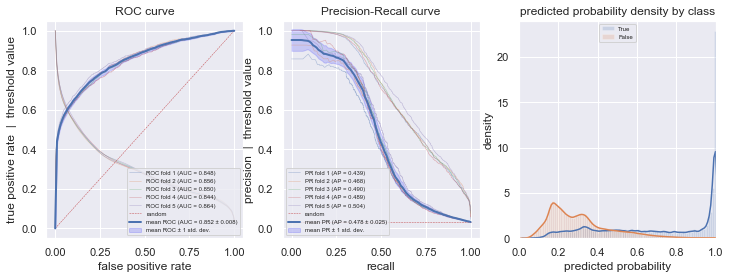

**sampling 1**

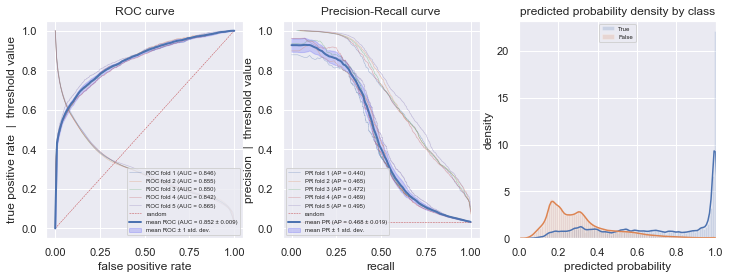

**sampling 2**

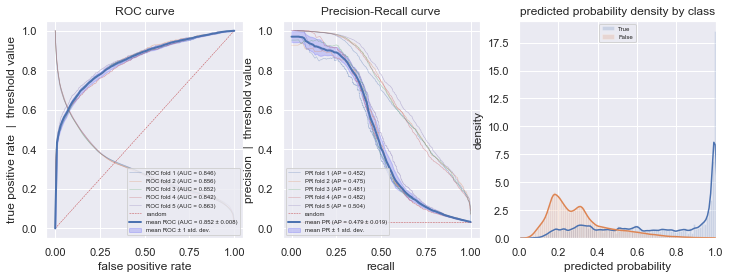

**sampling 3**

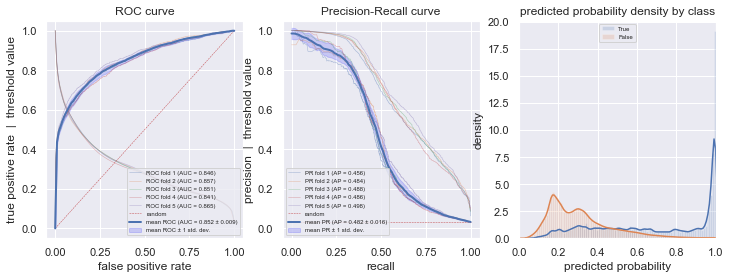

**sampling 4**

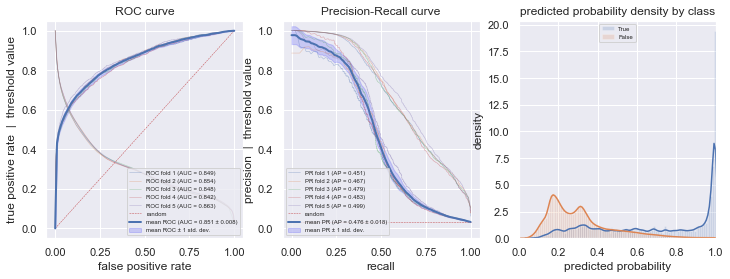

In [99]:
for (i, job) in enumerate(job_list):
    if hasattr(job, 'metrics'):
        print_md('**sampling {}**'.format(i))
        job.metrics.plot_threshold_decision_curves(figsize=(12, 4))
        plt.show()

**sampling 0**

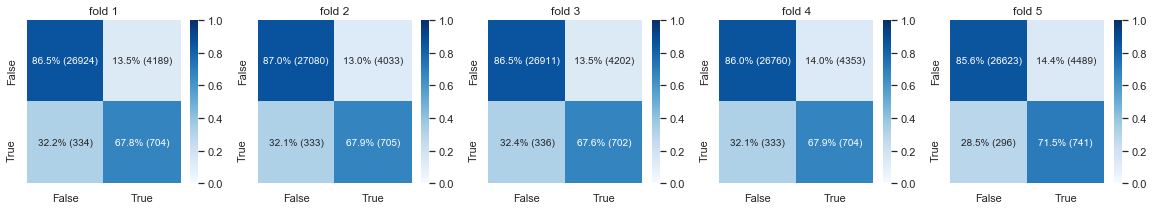

**sampling 1**

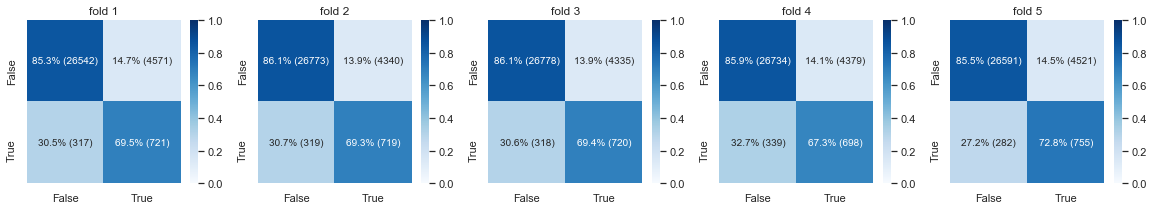

**sampling 2**

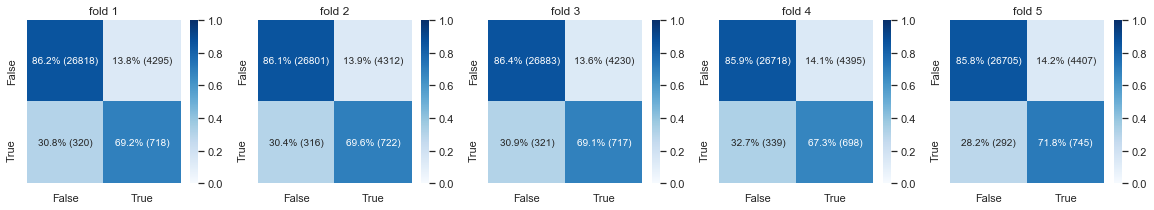

**sampling 3**

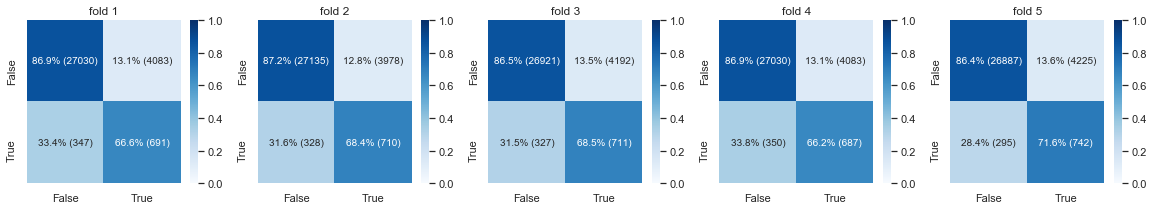

**sampling 4**

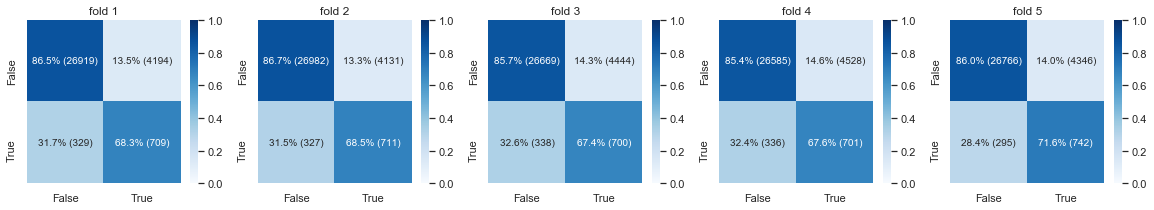

In [100]:
for (i, job) in enumerate(job_list):
    if hasattr(job, 'metrics'):
        print_md('**sampling {}**'.format(i))
        job.metrics.plot_confusion_matrix()
        plt.show()

In [90]:
for (i, job) in enumerate(job_list):
    if hasattr(job, 'metrics'):
        print_md('**sampling {}**'.format(i))
        job.metrics.plot_grid_search_results(plot_error_bar=False)
        plt.show()

In [101]:
for i, color in enumerate(['navy', 'indigo', 'purple', 'darkviolet', 'orchid']):
    summary.add(job_list[i].metrics, 'RandomForest_unified_sampling_{}'.format(i), color)

## Summary

In [103]:
summary = Summary()
summary.load('sampling_unified_summary.pkl')
#summary.save('sampling_unified_summary.pkl')

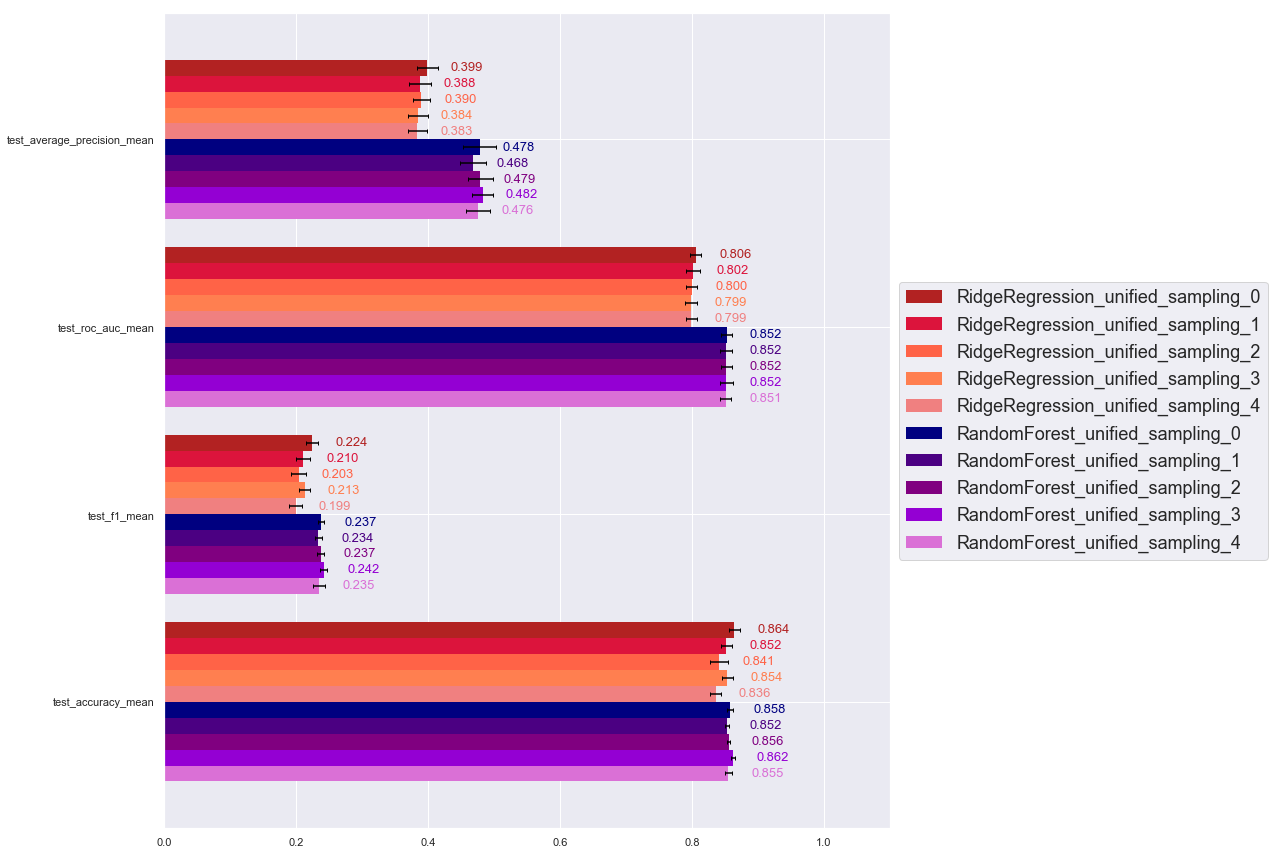

In [102]:
summary.display()
summary.plot(figsize=(13, 15))